# Interpolation
__Author__ : sara sadat nasr

__Course__ : Undergraduate Numerical Analysis Course

## Problem 1
Find a polynomial interpolation function for f(x) = cos x

$x = 0.2, 0.4, 0.6, 0.8$

For polynomial interpolation function you should consider:

$p(x) = a + bx + cx^2 + dx^3$

You should solve 4 equations with 4 variables to obtain unknown variables. You should plot $f(x)$,

$p(x)$ and E(x) which presents interpolation error through interval $x \in [0, 1]$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

In [3]:
def f(x):
  return np.cos(x)

In [4]:
def L(x, i, x_values):
  product = 1
  for j in range(len(x_values)):
    if j != i:
      product *= (x - x_values[j]) / (x_values[i] - x_values[j])
  return product


In [5]:
def p(x, x_values, y_values):
  sum = 0
  for i in range(len(y_values)):
    sum += y_values[i] * L(x, i, x_values)
  return sum

In [6]:
def E(x, x_values, y_values):
  return f(x) - p(x, x_values, y_values)

In [7]:
x_values = [0.2, 0.4, 0.6, 0.8]
y_values = [f(x) for x in x_values]
x_range = np.linspace(0, 1, 100)

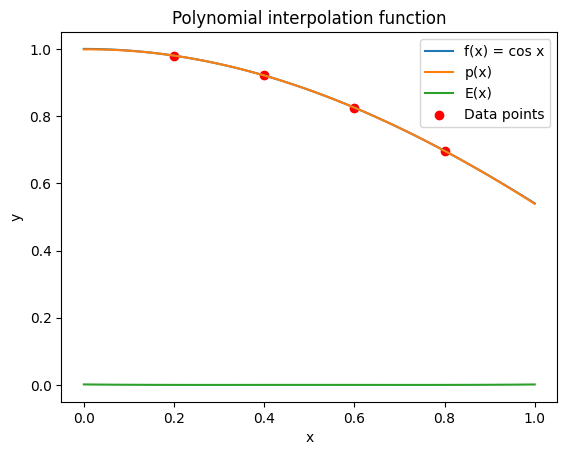

In [8]:
plt.plot(x_range, f(x_range), label="f(x) = cos x")
plt.plot(x_range, p(x_range, x_values, y_values), label="p(x)")
plt.plot(x_range, E(x_range, x_values, y_values), label="E(x)")
plt.scatter(x_values, y_values, color="red", label="Data points")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial interpolation function")
plt.show()

## Problem 2

Find a polynomial interpolation function for $f(x) = cos 2x$ which interpolates $f'(x)$ in addition to $f(x)$

$x = 0.2, 0.4, 0.6, 0.8$

In the end of this task, your suggested interplation function should satisfy two conditions:

$(p(x_i) = f(x_i)$

$p'(x_i) = f'(x_i)$

Two plots will be mandatory for this task. First plot contains $f(x)$, $p(x)$ and $E(x)$ which presents
interpolation error through interval x ∈ [0, 1]. Second plot contains $f′(x)$, $p′(x)$ and $E′(x)$ which
presents first order derivation interpolation error through interval $x \in [0, 1]$.

In [9]:
def f(x):
  return np.cos(2 * x)

def df(x):
  return -2 * np.sin(2 * x)

In [10]:
def L(x, i, x_values):
  product = 1
  for j in range(len(x_values)):
    if j != i:
      product *= (x - x_values[j]) / (x_values[i] - x_values[j])
  return product

In [11]:
def dL(x, i, x_values):
  sum = 0
  for j in range(len(x_values)):
    if j != i:
      sum += L(x, i, x_values) / (x - x_values[j])
  return sum

In [12]:
def p(x, x_values, y_values, dy_values):
  sum = 0
  for i in range(len(y_values)):
    sum += y_values[i] * L(x, i, x_values) + dy_values[i] * dL(x, i, x_values)
  return sum

In [13]:
def E(x, x_values, y_values, dy_values):
  return f(x) - p(x, x_values, y_values, dy_values)

In [14]:
def dE(x, x_values, y_values, dy_values):
  return df(x) - p(x, x_values, dy_values)

In [15]:
x_values = [0.2, 0.4, 0.6, 0.8]
y_values = [f(x) for x in x_values]
dy_values = [df(x) for x in x_values]
x_range = np.linspace(0, 1, 100)

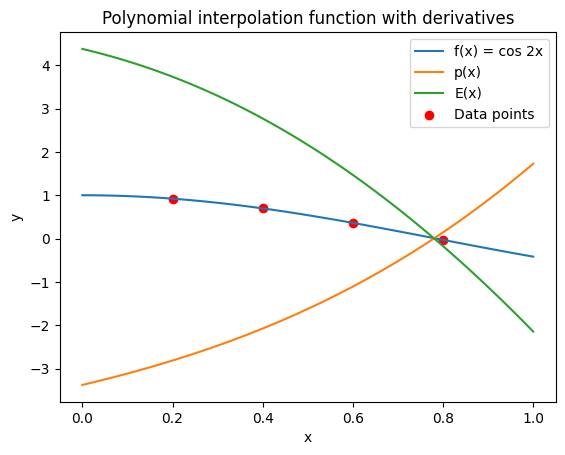

In [16]:
plt.plot(x_range, f(x_range), label="f(x) = cos 2x")
plt.plot(x_range, p(x_range, x_values, y_values, dy_values), label="p(x)")
plt.plot(x_range, E(x_range, x_values, y_values, dy_values), label="E(x)")
plt.scatter(x_values, y_values, color="red", label="Data points")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial interpolation function with derivatives")
plt.show()


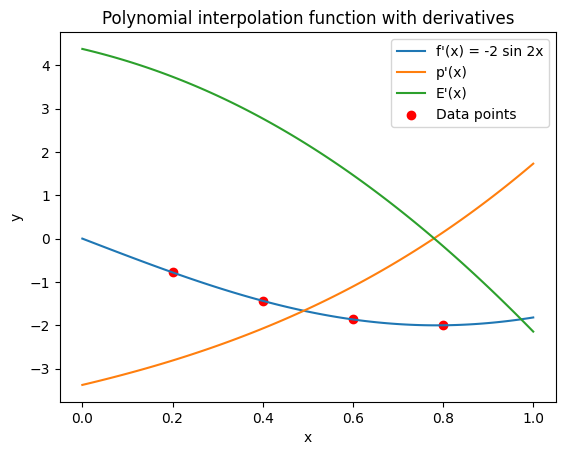

In [17]:
plt.plot(x_range, df(x_range), label="f'(x) = -2 sin 2x")
plt.plot(x_range, p(x_range, x_values, y_values, dy_values), label="p'(x)")
plt.plot(x_range, E(x_range, x_values, y_values, dy_values), label="E'(x)")
plt.scatter(x_values, dy_values, color="red", label="Data points")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial interpolation function with derivatives")
plt.show()

## Problem 3
Consider $p(x) = a_0 + a_1x + · · · + a_6x^6$ as an interpolation function for a given function:

$x = 2, 4, 5$

$y = 12, 18, 13$

$y’ = 0, 1, 0$

$y” = *, -0.7, * $

Form equations, determine matrix shape, solve equation system and obtain unknown variables and
plot function

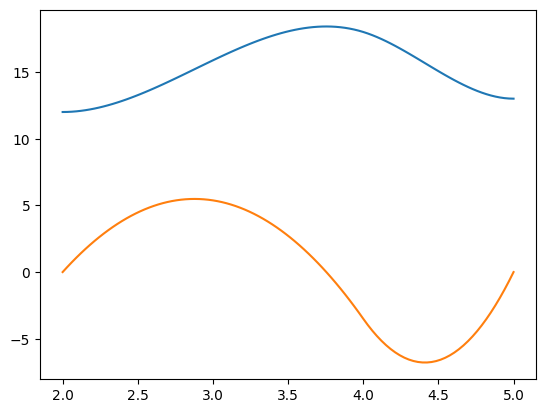

In [18]:
x_values = np.array([2, 4, 5])
y_values = np.array([12, 18, 13])
dy_values = np.array([0, 1, 0])
d2y_values = np.array([0, -0.7, 0])

a = 2 
b = 5 

ya = y_values[0] 
yb = y_values[-1]
dya = dy_values[0] 
dyb = dy_values[-1]

spline = si.CubicSpline(x_values, y_values, bc_type=((1, dya), (1, dyb)))
x_range = np.linspace(a, b, 100)
y_spline = spline(x_range) 
dy_spline = spline.derivative(1)(x_range) 
d2y_spline = spline.derivative(2)(x_range) 

plt.plot(x_range, y_spline, label="spline")
plt.plot(x_range, dy_spline, label="s")

## Conclusion for this problem
The solution was to use a cubic spline method, which can handle both function values and derivative values at some points.

The cubic spline method involves creating piecewise cubic polynomials that have continuous first and second derivatives at the knots.

To use this method, the values and the first derivatives of the spline at the endpoints of the interval need to be specified.
 
The unknown coefficients of the polynomial interpolation function can be found by solving a system of linear equations that

involves the function values and the derivative values at the given points.